# An old FiPy solution to 1D BL
I'm not really sure if the result is correct

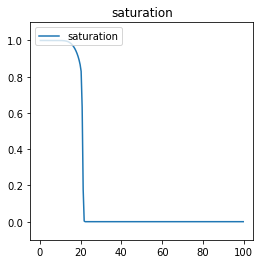

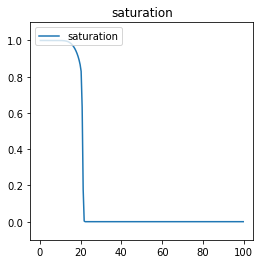

In [6]:
from fipy import *

u = 1.e-3
L = 100.
nx = 200
dt = 200.
dx = L/nx
muo = 0.002
muw = 0.001
mesh = Grid1D(dx = L/nx, nx = nx)
x = mesh.cellCenters
sw = CellVariable(mesh=mesh, name="saturation", hasOld=True, value = 0.)
sw.setValue(1,where = x<=dx)
sw.constrain(1.,mesh.facesLeft)
#sw.constrain(0., mesh.facesRight)
sw.faceGrad.constrain([0], mesh.facesRight)

eq = TransientTerm(coeff=1) + UpwindConvectionTerm(coeff = u
*(sw**2./muw)/(sw**2./muw+(1-sw)**2./muo) * [[1]]) == 0

sw.constrain(1.,mesh.facesLeft)
#sw.constrain(0., mesh.facesRight)
sw.faceGrad.constrain([0], mesh.facesRight)

steps = 100
viewer = Viewer(vars = sw, datamax=1.1, datamin=-0.1)
for step in range(steps):
    sw.updateOld()
    swres = 1.0e6
    while swres > 1e-5:
        swres = eq.sweep(dt = dt, var = sw)
        print(swres)
        
viewer.plot()